# Clustering peppers by temperature and humidity

In this notebook, i play around with **fuzzy c-means clustering** using some made-up data for different types of peppers. Each type of pepper likes slightly different growing conditions: temperature and humidity.

**Pepper types and preferences:**
- **Type A** – likes it cooler with medium humidity.
- **Type B** – prefers moderate temperatures and higher humidity.
- **Type C** – likes it hot and moderately humid.

I tried that a pepper belongs to more than one cluster such that i can see the effect of fuzzy clustering.

**What i do here:**
1. Generate synthetic pepper data with temperature and humidity.
2. Cluster them using fuzzy c-means into three groups.
3. Visualize the clusters and the fuzzy partition coefficient (FPC) to see how well the data fits.
4. Try predicting which cluster new peppers belong to.

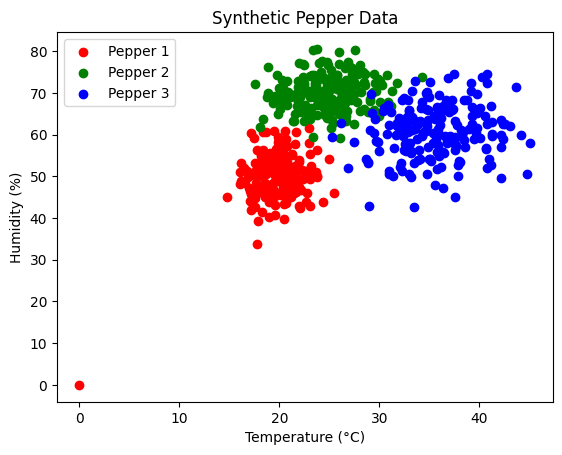

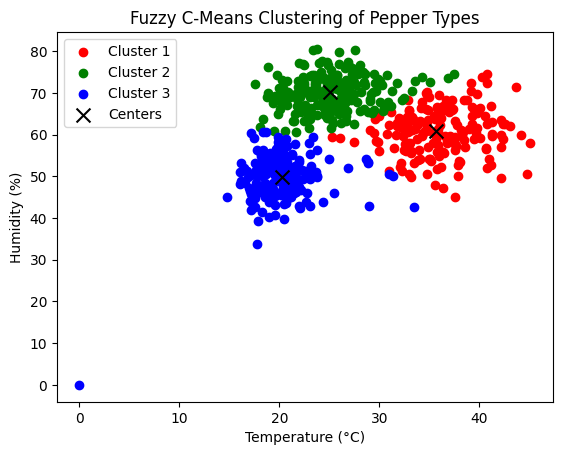

Fuzzy Partition Coefficient (FPC): 0.748856645939156


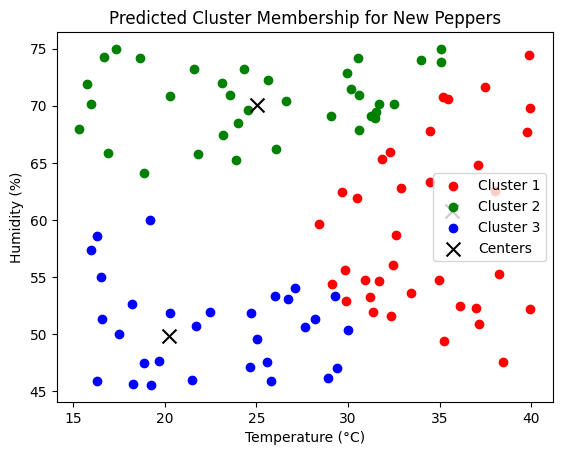

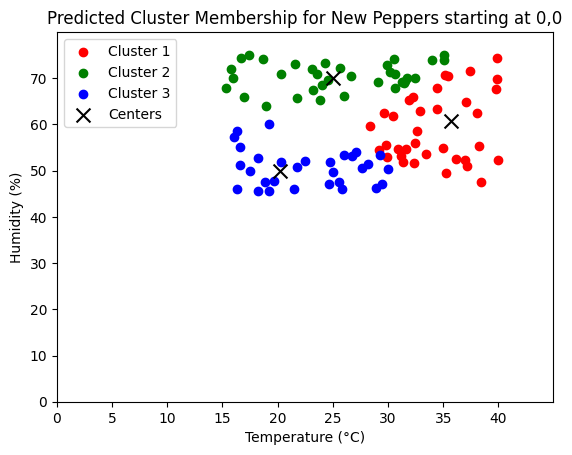

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

np.random.seed(42)

# plot colors
colors = ['r', 'g', 'b']

# centers for three pepper types (temperature, humidity) fictional values not researched
centers = [
    [20, 50],
    [25, 70],
    [35, 60]
]

# stdev for generating synthetic data
sigmas = [
    [2, 5],
    [3, 4],
    [4, 6]
]

# generate synthetic data for peppers
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((t_mu, h_mu), (t_sigma, h_sigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.normal(t_mu, t_sigma, 200)))
    ypts = np.hstack((ypts, np.random.normal(h_mu, h_sigma, 200)))
    labels = np.hstack((labels, np.ones(200) * i))

# plot generated data
fig, ax = plt.subplots()
for label in range(3):
    ax.scatter(xpts[labels == label], ypts[labels == label], color=colors[label], label=f"Pepper {label+1}")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Humidity (%)")
ax.set_title("Synthetic Pepper Data")
ax.legend()
plt.show()

# merge data for clustering
alldata = np.vstack((xpts, ypts))

# fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    alldata, c=3, m=2, error=0.005, maxiter=1000
)

# plot clustered data
fig, ax = plt.subplots()
ax.set_title("Fuzzy C-Means Clustering of Pepper Types")
cluster_membership = np.argmax(u, axis=0)
for j in range(3):
    ax.scatter(alldata[0, cluster_membership == j], alldata[1, cluster_membership == j],
               color=colors[j], label=f"Cluster {j+1}")
ax.scatter(cntr[:,0], cntr[:,1], marker='x', s=100, color='k', label='Centers')
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Humidity (%)")
ax.legend()
plt.show()

print("Fuzzy Partition Coefficient (FPC):", fpc)

# prediction cluster membership for new data
new_peppers = np.random.uniform(low=[15,45], high=[40,75], size=(100,2))
u_new, u0_new, d_new, jm_new, p_new, fpc_new = fuzz.cluster.cmeans_predict(
    new_peppers.T, cntr, m=2, error=0.005, maxiter=1000
)

# plot predictions
fig, ax = plt.subplots()
ax.set_title("Predicted Cluster Membership for New Peppers")
cluster_labels = np.argmax(u_new, axis=0)
for j in range(3):
    ax.scatter(new_peppers[cluster_labels == j,0], new_peppers[cluster_labels == j,1],
               color=colors[j], label=f"Cluster {j+1}")
ax.scatter(cntr[:,0], cntr[:,1], marker='x', s=100, color='k', label='Centers')
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Humidity (%)")
ax.legend()
plt.show()

# plot predictions at 0,0 for easier visual check
fig, ax = plt.subplots()
ax.set_title("Predicted Cluster Membership for New Peppers starting at 0,0")
cluster_labels = np.argmax(u_new, axis=0)
for j in range(3):
    ax.scatter(new_peppers[cluster_labels == j,0], new_peppers[cluster_labels == j,1],
               color=colors[j], label=f"Cluster {j+1}")
ax.scatter(cntr[:,0], cntr[:,1], marker='x', s=100, color='k', label='Centers')

ax.set_xlim(0, np.max(new_peppers[:,0])+5)
ax.set_ylim(0, np.max(new_peppers[:,1])+5)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Humidity (%)")
ax.legend()
plt.show()

